In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
kyphosis_df=pd.read_csv('kyphosis.csv')

In [5]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
avg_age=kyphosis_df['Age'].mean()
max_Age=kyphosis_df['Age'].max()
print(avg_age)
print(max_Age)

83.65432098765432
206


In [8]:
kyphosis_df.iloc[5] #for row

Kyphosis    absent
Age              1
Number           2
Start           16
Name: 5, dtype: object

In [9]:
kyphosis_df[kyphosis_df['Age']<=5]

,Kyphosis,Age,Number,Start
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
13,absent,1,4,12
15,absent,1,3,16
28,absent,4,3,16
36,absent,1,3,9
53,absent,2,2,17
56,absent,2,3,13


In [10]:
 kyphosis_df['Age']

0      71
1     158
2     128
3       2
4       1
     ... 
76    157
77     26
78    120
79     42
80     36
Name: Age, Length: 81, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder  #LabelEncoder():for changing string labels to numerical labels
kyphosis_df['Kyphosis']=LabelEncoder().fit_transform(kyphosis_df['Kyphosis'])
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [42]:
kyphosis_True=kyphosis_df[kyphosis_df['Kyphosis']==1]
kyphosis_False=kyphosis_df[kyphosis_df['Kyphosis']==0]



In [43]:
print( 'Disease Present after operation percentage =', (len(kyphosis_True)/len(kyphosis_df))*100)

Disease Present after operation percentage = 20.98765432098765


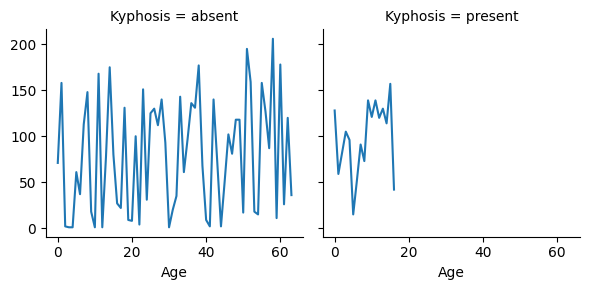

In [25]:
# Importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset from CSV file
data = pd.read_csv("kyphosis.csv")

# Creating FacetGrid plot
plot = sns.FacetGrid(data, col="Kyphosis")
plot.map(plt.plot, "Age")

# Displaying plot
plt.show()


<Axes: >

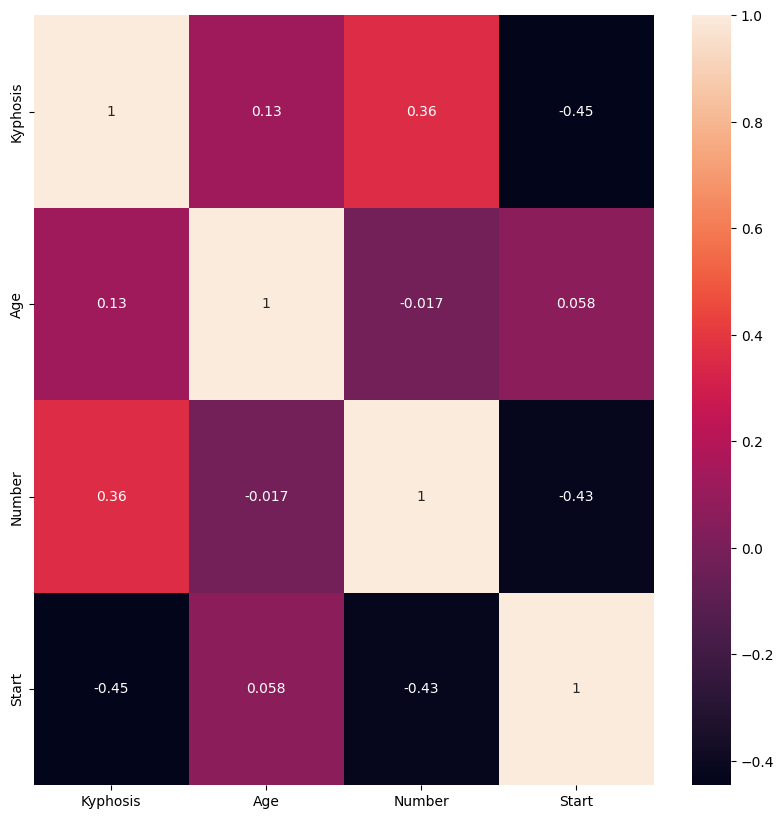

In [44]:
plt.figure(figsize=(10,10))
tc=kyphosis_df.corr()
sns.heatmap(tc,annot=True)



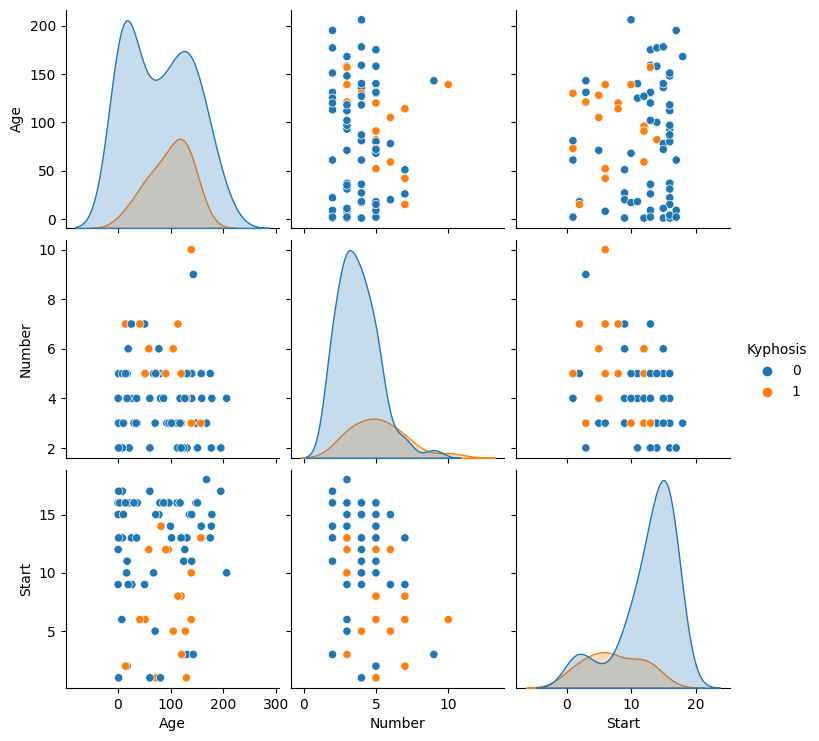

In [45]:
sns.pairplot(kyphosis_df,hue='Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

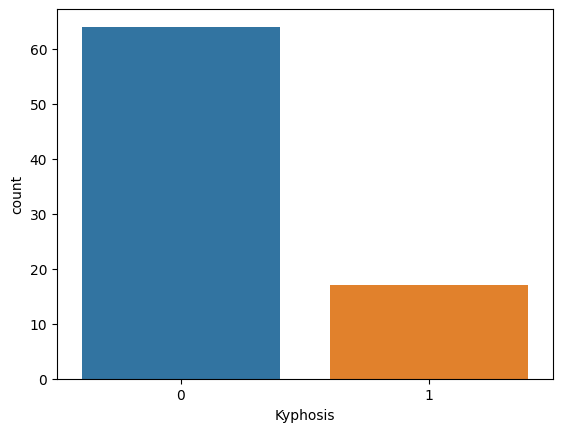

In [46]:
sns.countplot(x='Kyphosis',data=kyphosis_df)

In [51]:
#now we need to divide our dataframe(i.e input kyphosis data) into training data and testing data

In [53]:
x=kyphosis_df.drop(['Kyphosis'],axis=1)
#we are defining x and y by making output column as y
y=kyphosis_df['Kyphosis']

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size gives how much percentage of our data split as training data and testing data
#(i.e 20% testing data and 80% training data.. )

In [57]:
x_train.shape

(64, 3)

In [58]:
y_train.shape

(64,)

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_predict_test=model.predict(x_test)

<Axes: >

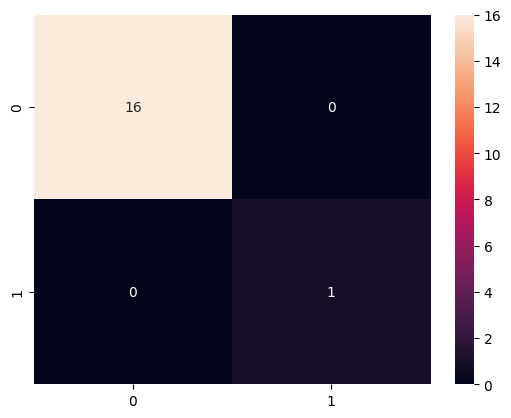

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [66]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         1

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [81]:
#Now using decision tree to train same model
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [82]:
y_predict_test=decision_tree.predict(x_test)

<Axes: >

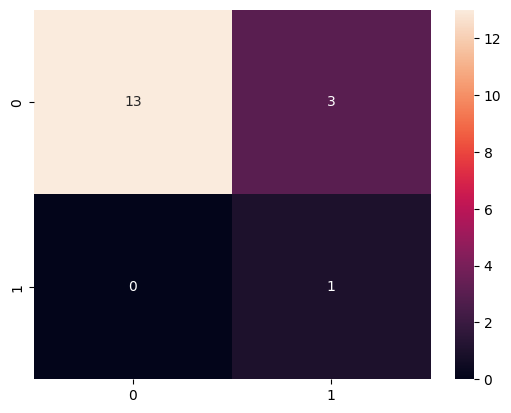

In [84]:
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [85]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.25      1.00      0.40         1

    accuracy                           0.82        17
   macro avg       0.62      0.91      0.65        17
weighted avg       0.96      0.82      0.87        17

